In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
data = pd.read_csv('term-deposit-marketing-2020.csv')

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [78]:
data.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [79]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [80]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [ ]:
##Exploratory Data Analysis

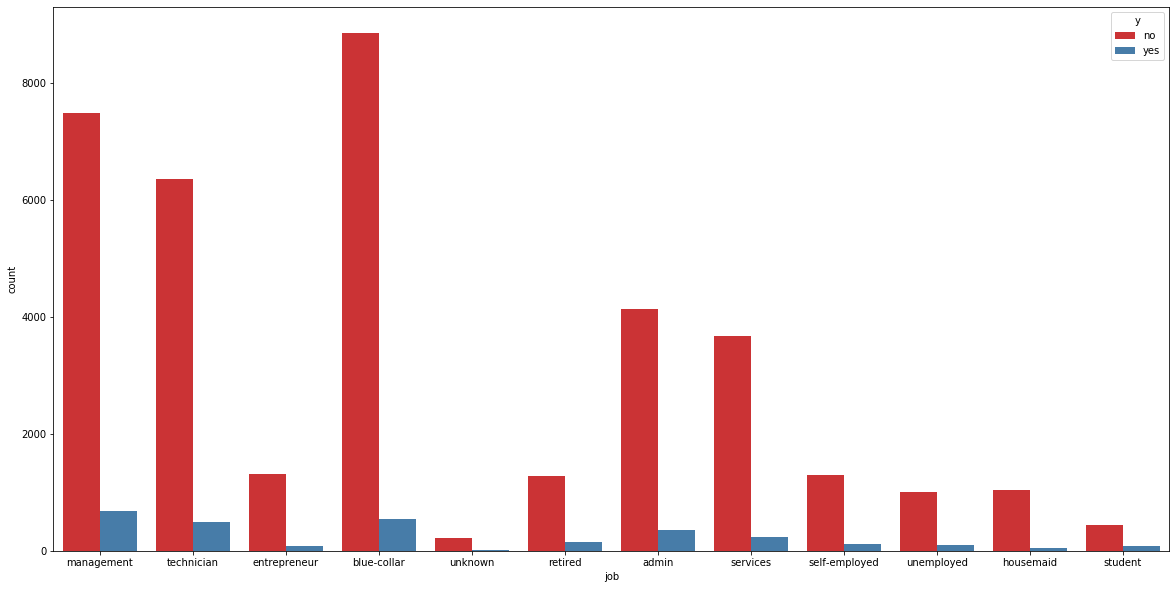

In [204]:
plt.figure(figsize=(20,10))
sns.countplot(x='job',hue='y',data=data,palette='Set1')

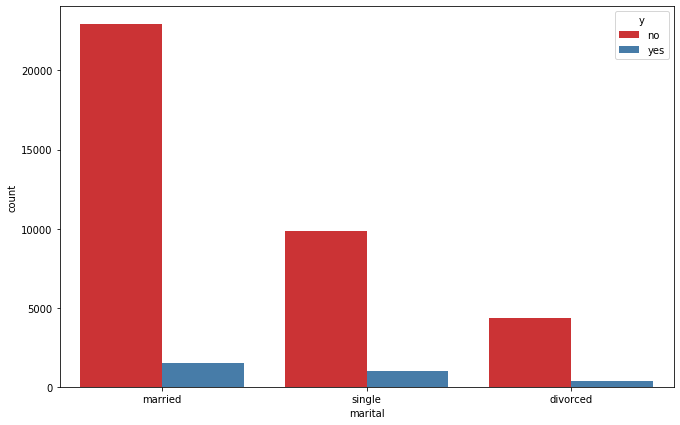

In [82]:
plt.figure(figsize=(11,7))
sns.countplot(x='marital',hue='y',data=data,palette='Set1')

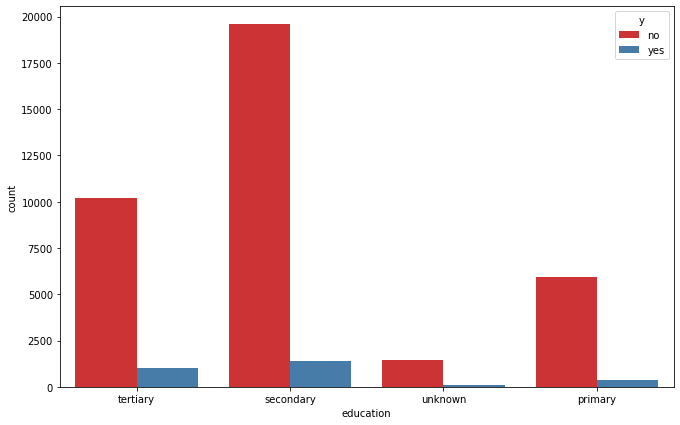

In [83]:
plt.figure(figsize=(11,7))
sns.countplot(x='education',hue='y',data=data,palette='Set1')

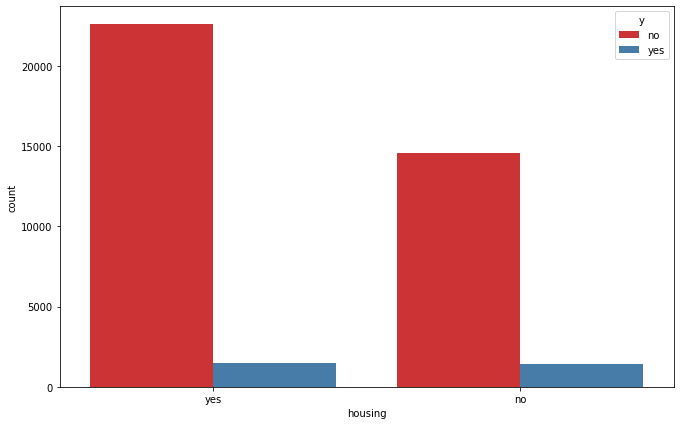

In [84]:
plt.figure(figsize=(11,7))
sns.countplot(x='housing',hue='y',data=data,palette='Set1')

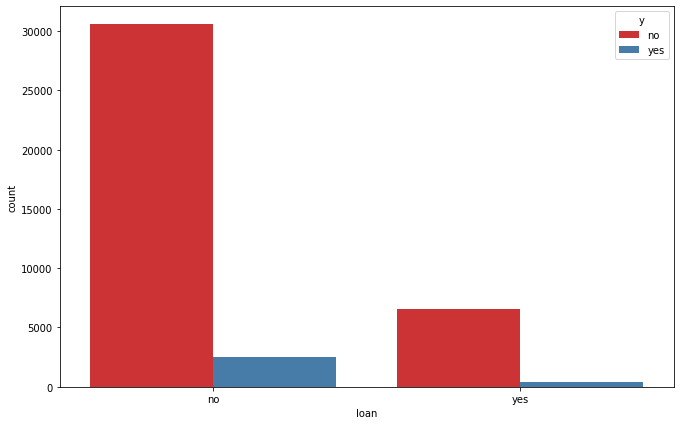

In [85]:
plt.figure(figsize=(11,7))
sns.countplot(x='loan',hue='y',data=data,palette='Set1')

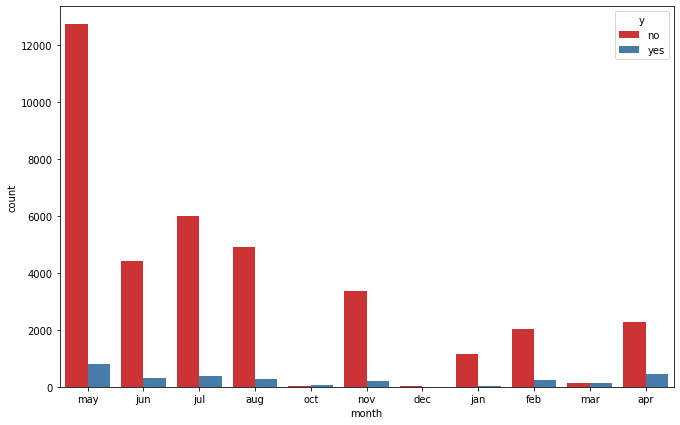

In [86]:
plt.figure(figsize=(11,7))
sns.countplot(x='month',hue='y',data=data,palette='Set1')

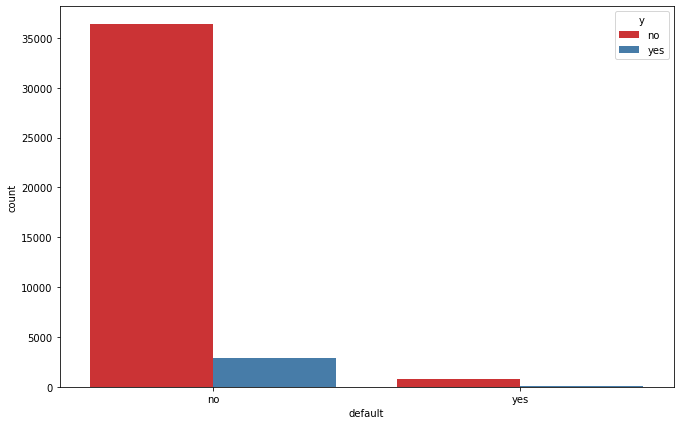

In [205]:
plt.figure(figsize=(11,7))
sns.countplot(x='default',hue='y',data=data,palette='Set1')

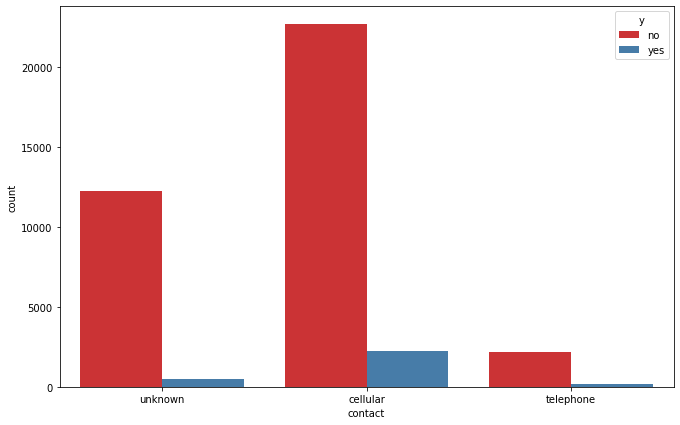

In [206]:
plt.figure(figsize=(11,7))
sns.countplot(x='contact',hue='y',data=data,palette='Set1')

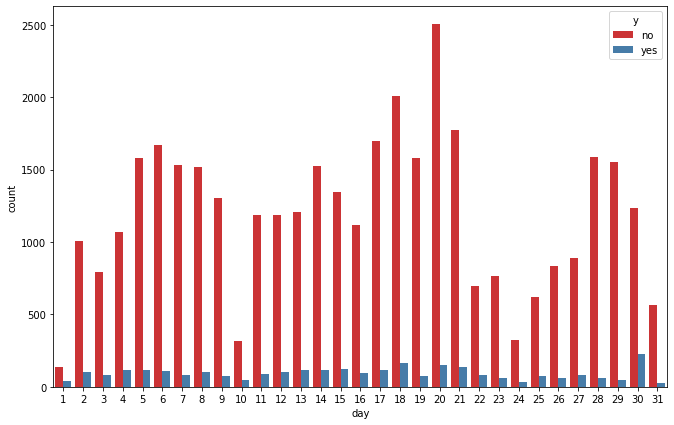

In [207]:
plt.figure(figsize=(11,7))
sns.countplot(x='day',hue='y',data=data,palette='Set1')

Text(0.5, 0, 'balance')

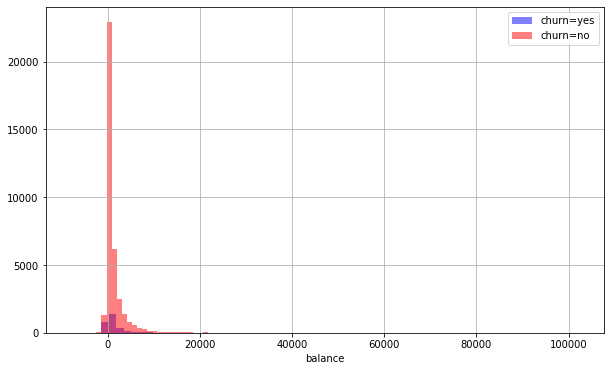

In [87]:
plt.figure(figsize=(10,6))
data[data['y']=='yes']['balance'].hist(alpha=0.5,color='blue',
                                              bins=30,label='y=yes')
data[data['y']=='no']['balance'].hist(alpha=0.5,color='red',
                                              bins=100,label='y=no')
plt.legend()
plt.xlabel('balance')

Text(0.5, 0, 'age')

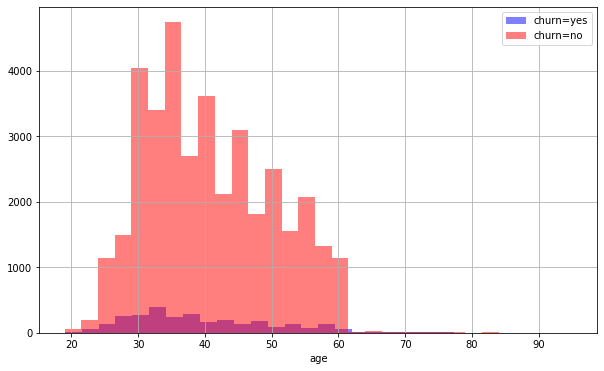

In [88]:
plt.figure(figsize=(10,6))
data[data['y']=='yes']['age'].hist(alpha=0.5,color='blue',
                                              bins=30,label='y=yes')
data[data['y']=='no']['age'].hist(alpha=0.5,color='red',
                                              bins=30,label='y=no')
plt.legend()
plt.xlabel('age')

Text(0.5, 0, 'duration')

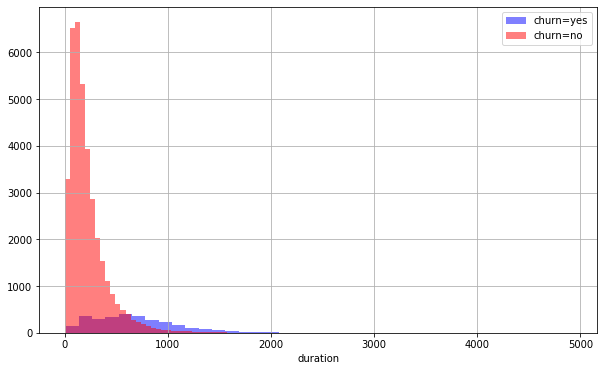

In [89]:


plt.figure(figsize=(10,6))
data[data['y']=='yes']['duration'].hist(alpha=0.5,color='blue',
                                              bins=30,label='y=yes')
data[data['y']=='no']['duration'].hist(alpha=0.5,color='red',
                                              bins=100,label='y=no')
plt.legend()
plt.xlabel('duration')

Text(0.5, 0, 'campaign')

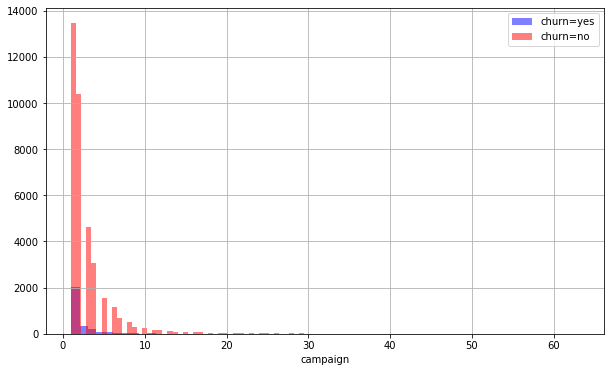

In [90]:

plt.figure(figsize=(10,6))
data[data['y']=='yes']['campaign'].hist(alpha=0.5,color='blue',
                                              bins=30,label='y=yes')
data[data['y']=='no']['campaign'].hist(alpha=0.5,color='red',
                                              bins=100,label='y=no')
plt.legend()
plt.xlabel('campaign')

In [91]:
X = data.drop(['y'], axis=1)

In [92]:
y = data['y']

In [93]:
X = pd.get_dummies(X, sparse=True)

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
from sklearn.model_selection import KFold

In [96]:
from sklearn.metrics import accuracy_score

In [97]:
kf = KFold(n_splits=5,shuffle=False)
kf.split(X)   

<generator object _BaseKFold.split at 0x00000204BD16F1C8>

In [98]:
accuracy_model = []

In [99]:
dtree = DecisionTreeClassifier()
for train_index, test_index in kf.split(X):
    # Split train-test
    print("TRAIN:", train_index, "TEST:", test_index)
    print("train lenght",len( train_index), "test_length", len(test_index))
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Train the model
    model = dtree.fit(X_train, y_train)
    accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)

TRAIN: [ 8000  8001  8002 ... 39997 39998 39999] TEST: [   0    1    2 ... 7997 7998 7999]
train lenght 32000 test_length 8000
TRAIN: [    0     1     2 ... 39997 39998 39999] TEST: [ 8000  8001  8002 ... 15997 15998 15999]
train lenght 32000 test_length 8000
TRAIN: [    0     1     2 ... 39997 39998 39999] TEST: [16000 16001 16002 ... 23997 23998 23999]
train lenght 32000 test_length 8000
TRAIN: [    0     1     2 ... 39997 39998 39999] TEST: [24000 24001 24002 ... 31997 31998 31999]
train lenght 32000 test_length 8000
TRAIN: [    0     1     2 ... 31997 31998 31999] TEST: [32000 32001 32002 ... 39997 39998 39999]
train lenght 32000 test_length 8000


In [100]:
print(accuracy_model)

[84.775, 89.3375, 94.0, 87.64999999999999, 85.5875]


In [101]:
import statistics
statistics.mean(accuracy_model)

88.27

In [ ]:
# I applied decisionTree algorithm to predict whether the client has subscribed to a term deposit or not
# average accuracy score with 5-fold cross validation is calculated as 88.27.

In [208]:
##BONUSES

## Question
##What makes the customers buy? Tell us which feature we should be focusing more on.



In [203]:
X.head()

,age,balance,day,duration,campaign,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,58,2143,5,261,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,44,29,5,151,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,33,2,5,76,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,47,1506,5,92,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,33,1,5,198,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [209]:
from sklearn.feature_selection import RFE

model = DecisionTreeClassifier()

rfe = RFE(model, 1)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 1
Selected Features: [False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]
Feature Ranking: [ 3  2  4  1  5 20 15 32 41 14 37 31 19 35 12 30 42 23 10 26 22  6 16 28
 43 33  7 25 27 18 11 39 21  8 36 44 29 40 24 38  9 13 34 17]


In [ ]:
## Answer

##I applied Recursive Feature Elimination algorithm in order to decide the feature that is most important.
## According to the algorithm Duration is the most important feature and this is also make sense. 
##If our client keep the duration of phone call long the probability of selling the product will increase.

In [224]:
##Question

##We are also interested in finding customers who are more likely to buy the investment product. 
##Determine the segment(s) of customers our client should prioritize.



In [225]:

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [219]:
data.groupby(['job'])['y'].value_counts(normalize = 'True')

job            y  
admin          no     0.921704
               yes    0.078296
blue-collar    no     0.942982
               yes    0.057018
entrepreneur   no     0.937367
               yes    0.062633
housemaid      no     0.951242
               yes    0.048758
management     no     0.917218
               yes    0.082782
retired        no     0.894920
               yes    0.105080
self-employed  no     0.920792
               yes    0.079208
services       no     0.939130
               yes    0.060870
student        no     0.843511
               yes    0.156489
technician     no     0.927466
               yes    0.072534
unemployed     no     0.913043
               yes    0.086957
unknown        no     0.927660
               yes    0.072340
Name: y, dtype: float64

In [220]:
data.groupby(['education'])['y'].value_counts(normalize = 'True')

education  y  
primary    no     0.943700
           yes    0.056300
secondary  no     0.932454
           yes    0.067546
tertiary   no     0.908174
           yes    0.091826
unknown    no     0.937296
           yes    0.062704
Name: y, dtype: float64

In [223]:
data.groupby(['marital'])['y'].value_counts(normalize = 'True')

marital   y  
divorced  no     0.917249
          yes    0.082751
married   no     0.939391
          yes    0.060609
single    no     0.905685
          yes    0.094315
Name: y, dtype: float64

In [221]:
data.groupby(['default'])['y'].value_counts(normalize = 'True')

default  y  
no       no     0.927356
         yes    0.072644
yes      no     0.939431
         yes    0.060569
Name: y, dtype: float64

In [222]:
data.groupby(['housing'])['y'].value_counts(normalize = 'True')

housing  y  
no       no     0.910326
         yes    0.089674
yes      no     0.939079
         yes    0.060921
Name: y, dtype: float64

In [ ]:
##Answer

##Our client should prioritize customers who is single, with no housing, with no credit in default, who have tertiary education and customers which are retired or student